# Battle of the Neighborhoods ( Toronto )

## Business problem statement:
Since Canada has become on the spotlight of young professionals during the last years because of the benefits offered to skilled professionals, my wife and I decided to explore the idea of moving to Toronto looking for quieter life and eventually establish a family, so far we are in the process of paperwork and being optimistic we should be travelling in a couple of months.

However the consequences of a big decision like this involves many aspects to cover, so, with the help of this course, I am going to tackle a problem that come to my mind recently:

**How do we choose the best neighborhood to initially move?**

Given that we do not have previous knowledge of the City, by “initially” I mean that our plan is to rent a place for a couple of months, then eventually move to an area near to our jobs and study centers.

In order to narrow the scope, the neighborhood should meet the following requirements:

* Easy access to public transportation
* Lot of restaurants, since we are not keen on cooking
* Low Crime rates 
* Affordable Rent Prices 
* Things to do in the cornerstones
* Some night life should be welcome



## Required data

**1- Neighborhoods Crime data in Toronto**
- Since I have no previous knowledge of the dangerous neighborhoods, my initial dataset will be the police dataset for crime
- It provides the crime rate per neighborhood and per year.
- Besides the dataset provides the data for different crimes, let's take the "Total_Rate" which is assigned by the police
- As long as the "Total_Rate" increases, more crimes have been reported in that neighborhood
- The "latitude" and "longitude" will be calculated per each Crime neighborhood, since those ones will be used later to match the Airbnb dataset and for invoking the Foursquare API.
- The Crime Neighbohood will be the key column used for the clustering process
http://data.torontopolice.on.ca/datasets/af500b5abb7240399853b35a2362d0c0_0?geometry=-79.812%2C43.632%2C-78.944%2C43.805&selectedAttribute=Total_Rate

**2- AirBnb Prices prices** - http://insideairbnb.com/get-the-data.html
- It provides the list of prices for available places to rent per neighborhood
- It is required to clean the outliers
- Then, let's match each Airbnb listing to its respective neighborhood accoding the previous dataset, the columns "latitude" and "longitude" wil be used for this purpose, so the nearest Crime Neighbohood will be assigned
- Finally, let's calculate the average price per Crime Neighbohood

**3- Foursquare data**
- It provides a list of available restaurants, venues, bus/subway stations in each neighborhood
- It is required to filter the neighbohood that contains bus/train stations, using the Foursquare API we will search a 1km peripheria
- Finally, once we filter and merge the 3 datasets, it will be used a clustering analysis per neighborhood

# Methodology

### Machine Learning approach

Overall, I will use the data available in the sources to perform a clustering based analysis to find the group that better meet the initial requirements.

It is expected to find one or more clusters with neighborhoods with crime rates under the average, rent prices around the average, with lots of restaurants and with bus/train stations.

Finally, once plotted in a map, it should be easier to decide which cluster is near to the university we are going to study.


## Load Crime Dataset

In [11]:
#!pip install geocoder

    100% |████████████████████████████████| 102kB 7.6MB/s ta 0:00:01
Requirement not upgraded as not directly required: future in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: click in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: decorator in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ratelim->geocoder)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->geocoder)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Pyt

In [14]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [17]:
def getLocationByAddress(address):
    address = address + ', Toronto, Ontario'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    return(location)

def getLatituteByLocation(location):
    if location is None:
        return None
    return(location.latitude)

def getLongitudeByLocation(location):
    if location is None:
        return None
    return(location.longitude)

In [19]:
print(location_result.latitude,location_result.longitude)

43.6935586 -79.4139023


In [20]:
print( getLatituteByLocation(location_result) , getLongitudeByLocation(location_result) )

43.6935586 -79.4139023


In [15]:
# The code was removed by Watson Studio for sharing.

,Neighbourhood_Formatted,Total_Rate
0,Mount Pleasant East,226.845357
1,Markland Wood,337.818494
2,Yonge-Eglinton,412.358054
3,Pleasant View,435.878584
4,Caledonia-Fairbank,438.229039


In [22]:
df_CrimeRate['location'] = df_CrimeRate['Neighbourhood_Formatted'].apply(getLocationByAddress)

In [23]:
df_CrimeRate['Latitute'] = df_CrimeRate['location'].apply(getLatituteByLocation)
df_CrimeRate['Longitude'] = df_CrimeRate['location'].apply(getLongitudeByLocation)
df_CrimeRate

,Neighbourhood_Formatted,Total_Rate,location,Latitute,Longitude
0,Mount Pleasant East,226.845357,"(Mount Pleasant, 1, Eglinton Avenue East, Davi...",43.708417,-79.390135
1,Markland Wood,337.818494,"(Markland Wood Golf Club, 245, Markland Drive,...",43.631238,-79.585437
2,Yonge-Eglinton,412.358054,"(Yonge & Eglinton, Old Toronto, Toronto, Ontar...",43.706748,-79.398327
3,Pleasant View,435.878584,"(Pleasant View, North York, Toronto, Ontario, ...",43.787048,-79.333714
4,Caledonia-Fairbank,438.229039,"(Caledonia Road, Fairbank, York, Toronto, Onta...",43.698951,-79.463611
5,Tam O'Shanter-Sullivan,450.852500,None,NaN,NaN
6,Banbury-Don Mills,454.500786,"(Banbury Road, The Bridle Path, North York, To...",43.734804,-79.357243
7,High Park-Swansea,467.289720,"(high park, 1, Colborne Lodge Drive, High Park...",43.645593,-79.465320
8,Leaside-Bennington,477.644278,None,NaN,NaN
9,Pelmo Park-Humberlea,522.445043,"(Pelmo Park Public School, 180, Gary Drive, Hu...",43.712195,-79.517511


In [95]:
#df_CrimeRate.to_csv('df_CrimeRate.csv', sep='\t', encoding='utf-8')

In [29]:
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode()) # base64.b64encode("password".encode("utf-8"))
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [27]:
create_download_link(df_CrimeRate)

#### Identify the Neighbourhood with missing Latitute and Longitude

In [96]:
df_CrimeRate[df_CrimeRate['location'].isnull()]

,Neighbourhood_Formatted,Total_Rate,location,Latitute,Longitude
5,Tam O'Shanter-Sullivan,450.852500,None,NaN,NaN
8,Leaside-Bennington,477.644278,None,NaN,NaN
19,Westminster-Branson,596.650133,None,NaN,NaN
26,Humewood-Cedarvale,665.228335,None,NaN,NaN
33,Thistletown-Beaumond Heights,748.176320,None,NaN,NaN
34,Rockcliffe-Smythe,754.408289,None,NaN,NaN
37,Willowridge-Martingrove-Richview,793.621901,None,NaN,NaN
38,Weston-Pellam Park,795.939555,None,NaN,NaN
39,Bridle Path-Sunnybrook-York Mills,825.351539,None,NaN,NaN
48,Brookhaven-Amesbury,871.598639,None,NaN,NaN


### Manually look for the latitude and longitude, then upload a csv file

In [11]:
body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='Toronto-Missing-Location2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_missing_location = pd.read_csv(body,sep=';')
df_missing_location.head()

,Neighbourhood_Formatted,location,Latitute,Longitude
0,Tam O'Shanter-Sullivan,None,43.779314,-79.305308
1,Leaside-Bennington,None,43.701639,-79.373594
2,Westminster-Branson,None,43.776741,-79.451484
3,Humewood-Cedarvale,None,43.692219,-79.426661
4,Thistletown-Beaumond Heights,None,43.737248,-79.565320


In [30]:
df_CrimeRate.head()

,Neighbourhood_Formatted,Total_Rate,location,Latitute,Longitude
0,Mount Pleasant East,226.845357,"(Mount Pleasant, 1, Eglinton Avenue East, Davi...",43.708417,-79.390135
1,Markland Wood,337.818494,"(Markland Wood Golf Club, 245, Markland Drive,...",43.631238,-79.585437
2,Yonge-Eglinton,412.358054,"(Yonge & Eglinton, Old Toronto, Toronto, Ontar...",43.706748,-79.398327
3,Pleasant View,435.878584,"(Pleasant View, North York, Toronto, Ontario, ...",43.787048,-79.333714
4,Caledonia-Fairbank,438.229039,"(Caledonia Road, Fairbank, York, Toronto, Onta...",43.698951,-79.463611


In [43]:
df_Toronto_Crime_temp =  pd.merge(df_CrimeRate, df_missing_location, on='Neighbourhood_Formatted', how='outer')

In [44]:
df_Toronto_Crime_temp['Latitute_x'] = df_Toronto_Crime_temp.apply(    
    lambda row: row['Latitute_y'] if np.isnan(row['Latitute_x']) else row['Latitute_x'],
    axis=1
)

df_Toronto_Crime_temp['Longitude_x'] = df_Toronto_Crime_temp.apply(
    lambda row: row['Longitude_y'] if np.isnan(row['Longitude_x']) else row['Longitude_x'],
    axis=1
)

In [46]:
df_Toronto_Crime = df_Toronto_Crime_temp[['Neighbourhood_Formatted','Total_Rate','Latitute_x','Longitude_x']]

In [47]:
create_download_link(df_Toronto_Crime)

## Load Airbnb Data

In [12]:
# The code was removed by Watson Studio for sharing.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.646168,-79.424510,Entire home/apt,469,4,7,2017-12-04,0.17,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,170,2013-08-27,1.50,2,365
2,10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.670186,-79.335848,Private room,69,1,77,2016-08-18,0.68,1,361
3,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,67,1,0,NaN,NaN,1,0
4,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,71,1,206,2018-11-25,1.99,2,358


### Data pre-processing: AirBnb Data
#### Clean outliers


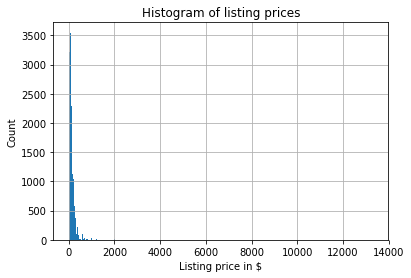

In [18]:
# histogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_airbnb_raw['price'].hist(bins=500)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

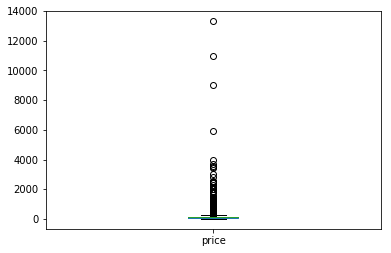

In [9]:
# using boxplot
df_airbnb.boxplot(column=['price'], grid=False)

In [21]:
df_airbnb_raw['price'].describe(percentiles=[.05,.10,.25, .5, .75,.90,.95])

count    19255.000000
mean       139.749935
std        210.438228
min          0.000000
5%          35.000000
10%         43.000000
25%         65.000000
50%        100.000000
75%        158.000000
90%        250.000000
95%        350.000000
max      13315.000000
Name: price, dtype: float64

In [26]:
# 1st attempt to clean outliers
df_airbnb = df_airbnb_raw.loc[(df_airbnb_raw['price'] > 0) & (df_airbnb_raw['price'] < 351)]
print (df_airbnb_raw.shape, df_airbnb.shape)


(19255, 16) (18381, 16)


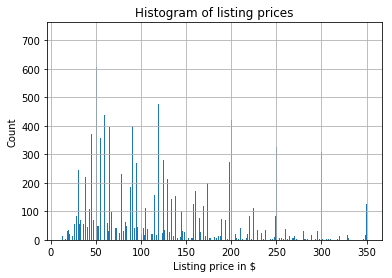

In [27]:
df_airbnb['price'].hist(bins=500)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

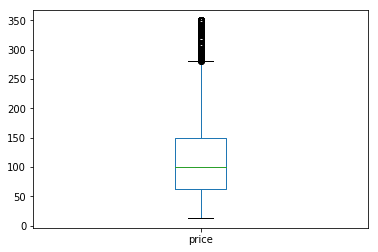

In [28]:
# using boxplot
df_airbnb.boxplot(column=['price'], grid=False)

In [ ]:
# Calculate average price per Crime Zone
# 1- Match map zone vs listing price
# 1.1 - Use the Latitute and Longitude
# 2- Calculate average


In [13]:
body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='df_Toronto_Crime.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Toronto_Crime = pd.read_csv(body)
df_Toronto_Crime.head()



,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135
1,1,Markland Wood,337.818494,43.631238,-79.585437
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327
3,3,Pleasant View,435.878584,43.787048,-79.333714
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611


### Calculate the Crime Neighborhood using the latitude and longitude in Airbnb dataset

In [63]:
from operator import itemgetter

def getCrimeNeighborhoodByLatLong(location):
    #coords_1 = (latitude,longitude)
    coords_1 = (location[0],location[1])
    
    list_Neighborhoods = []
    
    for index,row in df_Toronto_Crime.iterrows():
        coords_2 = (row['Latitute_x'],row['Longitude_x'])
        distance_km = geopy.distance.vincenty(coords_1, coords_2).km
        if distance_km < 10:
            element = (row['Neighbourhood_Formatted'],distance_km)
            list_Neighborhoods.append(element)
            
    if len(list_Neighborhoods) > 0:
        list_Neighborhoods_sorted = sorted(list_Neighborhoods,key=itemgetter(1),reverse=False) #reverse=False to sort asc
        return(list_Neighborhoods_sorted[0]) #return the 1st element, then the item 1 of the tuple

# getCrimeNeighborhoodByLatLong(43.698951,-79.463611) # --> Caledonia-Fairbank
#getCrimeNeighborhoodByLatLong((43.698951,-79.463611)) # --> Caledonia-Fairbank

('Caledonia-Fairbank', 4.444254624153629e-05)

In [67]:
#df_airbnb['location'] = (df_airbnb['latitude'],df_airbnb['longitude'])
df_airbnb['location'] = df_airbnb.apply(    
    lambda row: (row['latitude'],row['longitude']),
    axis=1
)
df_airbnb.head() 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,170,2013-08-27,1.50,2,365,"(43.64105126982716, -79.37627700577788)"
2,10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.670186,-79.335848,Private room,69,1,77,2016-08-18,0.68,1,361,"(43.670185503701774, -79.33584783585275)"
3,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,67,1,0,NaN,NaN,1,0,"(43.66724068610337, -79.41597756109105)"
4,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,71,1,206,2018-11-25,1.99,2,358,"(43.69601674127723, -79.4546827470826)"
5,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.645305,-79.389404,Entire home/apt,198,5,35,2018-10-23,0.36,7,351,"(43.64530469992652, -79.3894036218733)"


In [69]:
#df_CrimeRate['location'] = df_CrimeRate['Neighbourhood_Formatted'].apply(getLocationByAddress)
df_airbnb['CrimeNeighborhood'] = df_airbnb['location'].apply(getCrimeNeighborhoodByLatLong)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [70]:
df_airbnb.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location,CrimeNeighborhood
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,170,2013-08-27,1.50,2,365,"(43.64105126982716, -79.37627700577788)","(Waterfront Communities-The Island, 0.18270934..."
2,10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.670186,-79.335848,Private room,69,1,77,2016-08-18,0.68,1,361,"(43.670185503701774, -79.33584783585275)","(Blake-Jones, 0.7557807294730221)"
3,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,67,1,0,NaN,NaN,1,0,"(43.66724068610337, -79.41597756109105)","(Annex, 0.7931420999069179)"
4,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,71,1,206,2018-11-25,1.99,2,358,"(43.69601674127723, -79.4546827470826)","(Caledonia-Fairbank, 0.7901059369485557)"
5,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.645305,-79.389404,Entire home/apt,198,5,35,2018-10-23,0.36,7,351,"(43.64530469992652, -79.3894036218733)","(Waterfront Communities-The Island, 0.97863431..."


In [79]:
df_airbnb['Neighbourhood_Formatted'] = df_airbnb.apply(    
    lambda row: row['CrimeNeighborhood'][0],
    axis=1
)

df_airbnb['CrimeNeighborhood_Distance_KM'] = df_airbnb.apply(    
    lambda row: row['CrimeNeighborhood'][1],
    axis=1
).head()
#df_airbnb.head() 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
df_airbnb_prices = df_airbnb.groupby(['Neighbourhood_Formatted'])['price'].mean()

In [86]:
df_airbnb_prices = pd.DataFrame(df_airbnb_prices)

In [96]:
#df_airbnb_prices.head()
create_download_link(df_airbnb_prices)

In [16]:

body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='df_airbnb_prices.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_airbnb_prices = pd.read_csv(body)
df_airbnb_prices.head()



,Neighbourhood_Formatted,price
0,Agincourt North,69.466667
1,Agincourt South-Malvern West,64.948276
2,Alderwood,97.289474
3,Annex,108.677570
4,Banbury-Don Mills,101.971429


## Merge Datasets: Crime Neighbourhood + Airbnb (average price per Neighbourhood)

In [17]:
df_Toronto_Crime.head()

,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135
1,1,Markland Wood,337.818494,43.631238,-79.585437
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327
3,3,Pleasant View,435.878584,43.787048,-79.333714
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611


In [18]:
df_Toronto_Crime_AirBnb = df_Toronto_Crime.merge(df_airbnb_prices,on='Neighbourhood_Formatted', how='inner')
#df_Toronto_Crime_temp =  pd.merge(df_CrimeRate, df_missing_location, on='Neighbourhood_Formatted', how='outer')
df_Toronto_Crime_AirBnb.head()

,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x,price
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


In [19]:
print( df_Toronto_Crime.shape, df_Toronto_Crime_AirBnb.shape)

(140, 5) (132, 6)


In [20]:
df_Toronto_Crime_AirBnb.head()

,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x,price
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


In [21]:
# Rename columns
df_Toronto_Crime_AirBnb.drop('Unnamed: 0', axis=1, inplace=True)

df_Toronto_Crime_AirBnb.rename(
    columns={'Latitute_x': 'Neighbourhood_Latitute'
             , 'Longitude_x': 'Neighbourhood_Longitude'             
             , 'Total_Rate': 'Neighbourhood_Total_Crime_Rate'
             , 'price': 'Airbnb_Avg_Price'             
            }
    , inplace=True)

df_Toronto_Crime_AirBnb.head()

,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price
0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


## Foursquare API
### Explore the neighborhoods in Toronto for merged dataset (Crime Neighborhood + Airbnb)


In [22]:
#Use geopy library to get the latitude and longitude values of Toronto City.
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [23]:
# The code was removed by Watson Studio for sharing.

In [24]:
import requests
def getNearbyVenues(names, latitudes, longitudes):
    radius = 1000 # 1000 meters of distance, 1km
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        try:            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            print ('****************************ERROR*****************************')
            print (url)
            #traceback.print_exc()

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get all places in 1km

In [25]:
toronto_venues = getNearbyVenues(names = df_Toronto_Crime_AirBnb['Neighbourhood_Formatted'],
                                   latitudes = df_Toronto_Crime_AirBnb['Neighbourhood_Latitute'],
                                   longitudes = df_Toronto_Crime_AirBnb['Neighbourhood_Longitude']
                                  )

Mount Pleasant East
Markland Wood
Yonge-Eglinton
Pleasant View
Caledonia-Fairbank
Tam O'Shanter-Sullivan
Banbury-Don Mills
High Park-Swansea
Leaside-Bennington
Pelmo Park-Humberlea
Guildwood
Forest Hill South
Maple Leaf
Oakwood Village
Casa Loma
Steeles
Lawrence Park South
Rouge
Centennial Scarborough
Westminster-Branson
The Beaches
Agincourt North
Runnymede-Bloor West Village
Willowdale East
Dufferin Grove
Bayview Village
Humewood-Cedarvale
Old East York
Clanton Park
South Parkdale
Englemount-Lawrence
Humber Heights-Westmount
Thistletown-Beaumond Heights
Rockcliffe-Smythe
Don Valley Village
Long Branch
Willowridge-Martingrove-Richview
Weston-Pellam Park
Bridle Path-Sunnybrook-York Mills
Edenbridge-Humber Valley
Broadview North
Danforth East York
Cabbagetown-South St.James Town
O'Connor-Parkview
Stonegate-Queensway
Flemingdon Park
Hillcrest Village
Brookhaven-Amesbury
Princess-Rosethorn
Islington-City Centre West
Morningside
Little Portugal
Agincourt South-Malvern West
Milliken
Parkwoo

In [26]:
toronto_venues.shape

(5360, 7)

In [27]:
toronto_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.708417,-79.390135,Istanbul Cafe & Espresso Bar,43.707891,-79.393049,Café
1,Mount Pleasant East,43.708417,-79.390135,La Carnita,43.707533,-79.394500,Taco Place
2,Mount Pleasant East,43.708417,-79.390135,Loblaws,43.707412,-79.394909,Supermarket
3,Mount Pleasant East,43.708417,-79.390135,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
4,Mount Pleasant East,43.708417,-79.390135,Copacabana Brazilian Steakhouse,43.707748,-79.393766,Churrascaria


In [30]:
create_download_link(toronto_venues,'toronto_venues.csv')

In [ ]:

body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='toronto_venues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto_venues = pd.read_csv(body)
toronto_venues.head()



### Filter neighborhoods that contains at least one station (Bus, metro or train)

In [31]:
toronto_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.708417,-79.390135,Istanbul Cafe & Espresso Bar,43.707891,-79.393049,Café
1,Mount Pleasant East,43.708417,-79.390135,La Carnita,43.707533,-79.394500,Taco Place
2,Mount Pleasant East,43.708417,-79.390135,Loblaws,43.707412,-79.394909,Supermarket
3,Mount Pleasant East,43.708417,-79.390135,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
4,Mount Pleasant East,43.708417,-79.390135,Copacabana Brazilian Steakhouse,43.707748,-79.393766,Churrascaria


In [32]:
toronto_valid_Neighbourhood_temp = toronto_venues[toronto_venues['Venue Category'].str.contains("Bus Line|Bus Station|Bus Stop|Light Rail Station|Metro Station|Train Station")==True]#['Neighbourhood']

In [33]:
toronto_valid_Neighbourhood_temp.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
177,Pleasant View,43.787048,-79.333714,TTC #Stop 2502/3,43.792240,-79.335834,Bus Station
234,Tam O'Shanter-Sullivan,43.779314,-79.305308,TTC Stop #7154/5,43.780852,-79.297855,Bus Stop
293,High Park-Swansea,43.645593,-79.465319,TTC High Park Loop,43.648191,-79.457575,Light Rail Station
295,High Park-Swansea,43.645593,-79.465319,TTC Stop #14281,43.637932,-79.465802,Bus Stop
300,High Park-Swansea,43.645593,-79.465319,TTC Stop #14395,43.637279,-79.469424,Light Rail Station


In [34]:
# remove duplicates
toronto_valid_Neighbourhood = pd.DataFrame({'count' : toronto_valid_Neighbourhood_temp.groupby( [ "Neighbourhood"] ).size()}).reset_index()

In [35]:
toronto_valid_Neighbourhood.head()

,Neighbourhood,count
0,Bayview Village,1
1,Casa Loma,2
2,Clairlea-Birchmount,5
3,Corso Italia-Davenport,4
4,Danforth East York,4


## Notice: only 48 Neighbourhoods have bus/train stations in 1km
### The future clustering will applied using this scope of 48 Neighbourhoods

In [36]:
toronto_valid_Neighbourhood.shape

(39, 2)

In [37]:
toronto_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.708417,-79.390135,Istanbul Cafe & Espresso Bar,43.707891,-79.393049,Café
1,Mount Pleasant East,43.708417,-79.390135,La Carnita,43.707533,-79.394500,Taco Place
2,Mount Pleasant East,43.708417,-79.390135,Loblaws,43.707412,-79.394909,Supermarket
3,Mount Pleasant East,43.708417,-79.390135,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
4,Mount Pleasant East,43.708417,-79.390135,Copacabana Brazilian Steakhouse,43.707748,-79.393766,Churrascaria


In [38]:
toronto_venues_valid = toronto_valid_Neighbourhood.merge(toronto_venues, on='Neighbourhood', how = 'inner')

In [39]:
toronto_venues_valid.shape

(1419, 8)

### Analyze Each Neighborhood

In [40]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_valid[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_valid['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Bayview Village,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,Casa Loma,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.024691,0.000000,0.0,0.0,0.0,0.0,0.000000,0.012346,0.0
2,Clairlea-Birchmount,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,Corso Italia-Davenport,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,Danforth East York,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,...,0.017857,0.000000,0.017857,0.0,0.0,0.0,0.0,0.017857,0.000000,0.0


### Top 10 venues into a dataframe

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Village,Coffee Shop,Furniture / Home Store,Café,Moving Target,Chinese Restaurant,Burger Joint,Bank,Shoe Store,Clothing Store,Sporting Goods Shop
1,Casa Loma,Coffee Shop,Sandwich Place,Pizza Place,Café,Indian Restaurant,Burger Joint,History Museum,Ice Cream Shop,French Restaurant,Jewish Restaurant
2,Clairlea-Birchmount,Bakery,Coffee Shop,Park,Bus Line,Bar,Business Service,Bus Stop,Bus Station,Metro Station,Soccer Field
3,Corso Italia-Davenport,Italian Restaurant,Coffee Shop,Breakfast Spot,Mexican Restaurant,Bakery,Park,Pet Store,Bus Stop,Café,Snack Place
4,Danforth East York,Coffee Shop,Pizza Place,Park,Ice Cream Shop,Pub,Sandwich Place,Bus Line,Skating Rink,Sushi Restaurant,Café


In [44]:
neighborhoods_venues_sorted.shape

(39, 11)

### Cluster Neighborhoods

In [46]:
df_Toronto_Crime_AirBnb.head()

,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price
0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


In [47]:
# Merge datasets
toronto_grouped_merge = pd.merge(toronto_grouped, df_Toronto_Crime_AirBnb, left_on = 'Neighborhood', right_on = 'Neighbourhood_Formatted', how = 'inner')

In [48]:
toronto_grouped_merge.head()

,Neighborhood,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Zoo,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price
0,Bayview Village,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,Bayview Village,664.032265,43.769197,-79.376662,80.209091
1,Casa Loma,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.012346,0.0,Casa Loma,564.283424,43.678111,-79.409408,118.485149
2,Clairlea-Birchmount,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,...,0.0,0.0,0.000000,0.000000,0.0,Clairlea-Birchmount,1269.028229,43.712712,-79.278331,63.535714
3,Corso Italia-Davenport,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,Corso Italia-Davenport,1405.975395,43.677261,-79.445929,84.300813
4,Danforth East York,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,...,0.0,0.0,0.017857,0.000000,0.0,Danforth East York,839.294230,43.686360,-79.300316,85.360465


In [49]:
toronto_grouped_merge.shape

(39, 227)

In [50]:
# Clean columns not used in clustering
columns_delete = ['Neighborhood','Neighbourhood_Formatted','Neighbourhood_Latitute','Neighbourhood_Longitude']

toronto_grouped_clustering =  toronto_grouped_merge.drop(columns_delete,1)

toronto_grouped_clustering.head()


,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Zoo,Neighbourhood_Total_Crime_Rate,Airbnb_Avg_Price
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,664.032265,80.209091
1,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012346,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.012346,0.0,564.283424,118.485149
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1269.028229,63.535714
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1405.975395,84.300813
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,...,0.017857,0.0,0.0,0.0,0.0,0.017857,0.000000,0.0,839.294230,85.360465


In [51]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

In [52]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 3, 0, 1, 0, 2, 0, 0], dtype=int32)

In [53]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
##

toronto_merged = toronto_grouped_merge # df_Toronto_Crime_temp
# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_
toronto_merged.head()

,Neighborhood,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Women's Store,Yoga Studio,Zoo,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price,Cluster Labels
0,Bayview Village,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,Bayview Village,664.032265,43.769197,-79.376662,80.209091,0
1,Casa Loma,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.012346,0.0,Casa Loma,564.283424,43.678111,-79.409408,118.485149,0
2,Clairlea-Birchmount,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,...,0.0,0.000000,0.000000,0.0,Clairlea-Birchmount,1269.028229,43.712712,-79.278331,63.535714,3
3,Corso Italia-Davenport,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,Corso Italia-Davenport,1405.975395,43.677261,-79.445929,84.300813,3
4,Danforth East York,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,...,0.0,0.017857,0.000000,0.0,Danforth East York,839.294230,43.686360,-79.300316,85.360465,0


In [54]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood_Formatted')

toronto_merged.head() # check the last columns!

,Neighborhood,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Village,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,Coffee Shop,Furniture / Home Store,Café,Moving Target,Chinese Restaurant,Burger Joint,Bank,Shoe Store,Clothing Store,Sporting Goods Shop
1,Casa Loma,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,Coffee Shop,Sandwich Place,Pizza Place,Café,Indian Restaurant,Burger Joint,History Museum,Ice Cream Shop,French Restaurant,Jewish Restaurant
2,Clairlea-Birchmount,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,...,Bakery,Coffee Shop,Park,Bus Line,Bar,Business Service,Bus Stop,Bus Station,Metro Station,Soccer Field
3,Corso Italia-Davenport,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,Italian Restaurant,Coffee Shop,Breakfast Spot,Mexican Restaurant,Bakery,Park,Pet Store,Bus Stop,Café,Snack Place
4,Danforth East York,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,...,Coffee Shop,Pizza Place,Park,Ice Cream Shop,Pub,Sandwich Place,Bus Line,Skating Rink,Sushi Restaurant,Café


# Results

### Examine clusters


In [56]:
#toronto_merged.groupby(['Cluster Labels']).size()

#toronto_merged[['Airbnb_Avg_Price', 'Cluster Labels']].groupby(['Cluster Labels']).agg(['mean', 'count'])

toronto_merged[['Airbnb_Avg_Price', 'Neighbourhood_Total_Crime_Rate', 'Cluster Labels']].groupby(['Cluster Labels']).agg(['mean', 'count'])
#toronto_merged.columns

Airbnb_Avg_Price       Neighbourhood_Total_Crime_Rate      
                           mean count                           mean count
Cluster Labels                                                            
0                     88.253657    22                     713.346275    22
1                     90.404933     5                    2924.449541     5
2                     57.772727     1                    5899.143673     1
3                     90.282678    11                    1476.597164    11

### Clusters:
#### Cluster 1: avg price and by far the lowest crime rate 
#### Cluster 2: avg price and the 2nd crime rate 
#### Cluster 3: The lowest price but it has, by far, the highest crime rate 
#### Cluster 4: avg price and the 2nd lowest crime rate 

### Explore the Clusters in detail

### Cluster 1 has the balance we are looking for

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Neighborhood,Zoo Exhibit,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Village,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Coffee Shop,Furniture / Home Store,Café,Moving Target,Chinese Restaurant,Burger Joint,Bank,Shoe Store,Clothing Store,Sporting Goods Shop
1,Casa Loma,0.000000,0.012346,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Coffee Shop,Sandwich Place,Pizza Place,Café,Indian Restaurant,Burger Joint,History Museum,Ice Cream Shop,French Restaurant,Jewish Restaurant
4,Danforth East York,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.017857,...,Coffee Shop,Pizza Place,Park,Ice Cream Shop,Pub,Sandwich Place,Bus Line,Skating Rink,Sushi Restaurant,Café
6,Edenbridge-Humber Valley,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Park,Massage Studio,Bus Line,Garden,Bus Stop,Restaurant,Golf Course,Zoo,Farmers Market,Food & Drink Shop
8,Englemount-Lawrence,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Coffee Shop,Shoe Store,Park,Pharmacy,Gym,Bank,Fast Food Restaurant,Pet Store,Furniture / Home Store,Food Court
9,Flemingdon Park,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Japanese Restaurant,Grocery Store,Park,Science Museum,Sandwich Place,Middle Eastern Restaurant,Coffee Shop,Gym,Movie Theater,Beer Store
10,Forest Hill South,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Park,Café,Skating Rink,Coffee Shop,Bagel Shop,Pharmacy,Middle Eastern Restaurant,Salon / Barbershop,Sandwich Place,Burger Joint
12,Guildwood,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Park,Train Station,Hotel,Moving Target,Pizza Place,Bus Line,Coffee Shop,Grocery Store,Sandwich Place,Storage Facility
13,Henry Farm,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Coffee Shop,Park,Bus Station,Moving Target,Trail,Train Station,Intersection,Tennis Court,Women's Store,Flea Market
15,High Park-Swansea,0.000000,0.000000,0.028571,0.0,0.0,0.0,0.0,0.000000,0.000000,...,Light Rail Station,Garden,Coffee Shop,Dog Run,Zoo,Pub,Food & Drink Shop,Liquor Store,Bus Stop,Scenic Lookout


## Finally, let's visualize the resulting clusters

In [58]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [59]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [60]:
#### Set the initial point in Toronto, Canada

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [61]:
import numpy as np

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighbourhood_Latitute'], toronto_merged['Neighbourhood_Longitude'], toronto_merged['Neighbourhood_Formatted'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Summary and Conclusions

#### 1. Not all neighborhood have close bus/train stations

#### 2. As it seems to be something related to common sense, the neighborhood with the lowest average price is the one with the highest crime rate

#### 3. From the remaining clusters, there is no significant difference in the average price, however the cluster #3 is by far the one with the lowest crime rate, consequently, this is our choice to move



In [ ]:
# Elbow Curve to find the optimum number of clusters

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score


bangalore_grouped_clustering = bangalore_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(bangalore_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



In [ ]:
# it is expected a graph